# Creating a connectivity table of the auditory neurons
Sent from Sama's Lab

In [4]:
import pandas as pd
import numpy as np
import json
_auditory_neurons = pd.read_csv("auditory_neuron_connections.csv.gz", compression='gzip')

auditory_neurons = _auditory_neurons.rename(columns={"Unnamed: 0": "index_in_connections_table"})

with open("unique_neuron_ids.json", "r") as f:
    unique_ids = json.load(f)

In [2]:
auditory_neurons

,index_in_connections_table,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,4,720575940616871878,720575940621203973,AVLP_L,13,GABA
2,6,720575940659399809,720575940604569824,AVLP_R,158,ACH
3,9,720575940619615552,720575940613174963,AVLP_R,5,ACH
4,10,720575940651461622,720575940612290019,AVLP_R,10,GLUT
...,...,...,...,...,...,...
692004,3869845,720575940634453093,720575940626663953,AMMC_L,3,ACH
692005,3869854,720575940624999114,720575940627970971,AVLP_R,1,ACH
692006,3869860,720575940628879055,720575940620502110,AVLP_L,4,ACH
692007,3869866,720575940612446866,720575940606567125,SAD,3,ACH


In [12]:
len(unique_ids)

21942

In [5]:
df_edgelist = auditory_neurons[["pre_root_id", "post_root_id", "syn_count"]]

In [7]:
# Create a connectivity matrix
vals = np.unique(auditory_neurons[["pre_root_id", 'post_root_id']])
vals

array([720575940600433181, 720575940600646173, 720575940602120928, ...,
       720575940661329281, 720575940661335681, 720575940661338497])

In [16]:
# Compare vals and unique_ids
print(len(vals))
print(len(unique_ids))


# compare the ids between the two
print(set(vals) - set(unique_ids))
print(set(unique_ids) - set(vals))

21942
21942
set()
set()


In [9]:
df_conn = pd.DataFrame(0, index=vals, columns=vals)
f = df_conn.index.get_indexer
df_conn.values[f(df_edgelist["pre_root_id"]), f(df_edgelist["post_root_id"])] = df_edgelist["syn_count"]


In [10]:
df_conn

,720575940600433181,720575940600646173,720575940602120928,720575940602132509,720575940602309600,720575940602313952,720575940602337504,720575940602353632,720575940602380768,720575940602382304,...,720575940661268865,720575940661289345,720575940661296257,720575940661309057,720575940661316993,720575940661321857,720575940661325697,720575940661329281,720575940661335681,720575940661338497
720575940600433181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940600646173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940602120928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940602132509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940602309600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720575940661321857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940661325697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940661329281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720575940661335681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


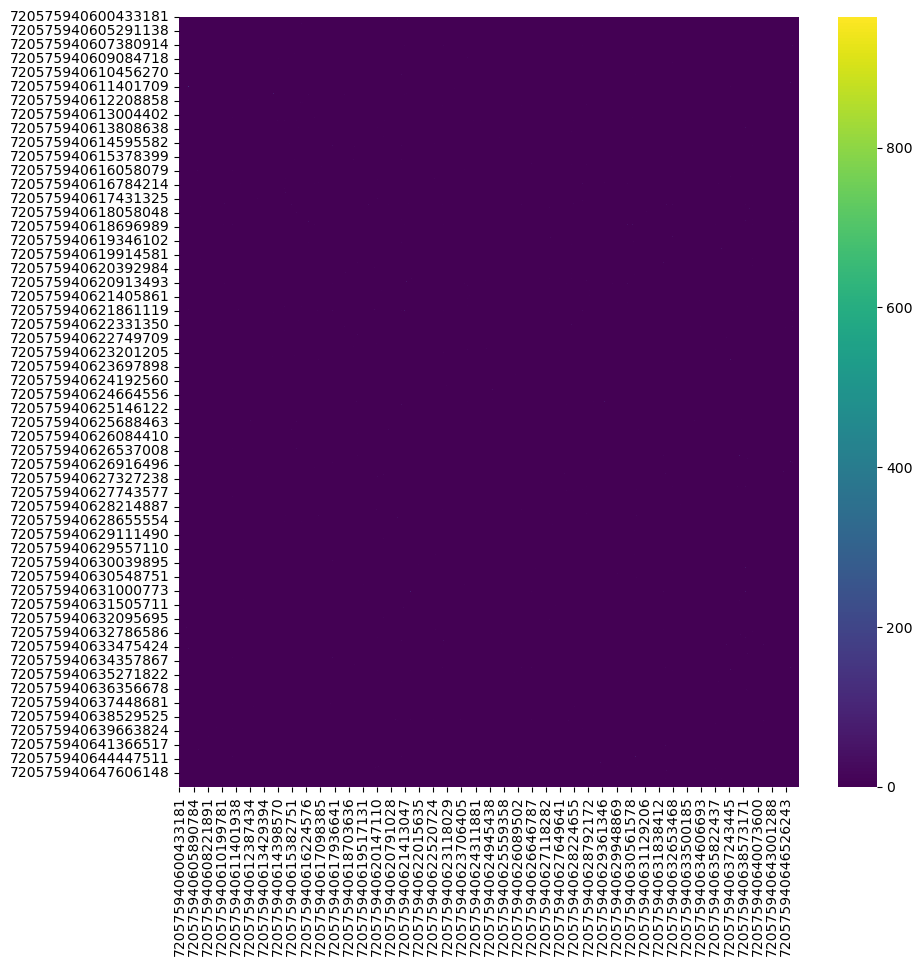

In [17]:
# PLot a heatmap of the connectivity matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df_conn, cmap="viridis")
plt.show()
